## medical data visualiser

In [20]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

In [3]:
data = pd.read_csv('medical_examination.csv')
df = data.copy()
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [6]:
df['BMI'] = df['weight']/(df['height']/100)**2
df['BMI']

0        21.967120
1        34.927679
2        23.507805
3        28.710479
4        23.011177
           ...    
69995    26.927438
69996    50.472681
69997    31.353579
69998    27.099251
69999    24.913495
Name: BMI, Length: 70000, dtype: float64

In [10]:
df['overweight'] = np.where(df['BMI']>25,1,0)
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,0


In [17]:
df['cholesterol']=df['cholesterol'].map({1:0,
                      2:1,
                      3:1
                      })

In [18]:
df['gluc'] = df['gluc'].map({1:0,
                      2:1,
                      3:1
                      })

In [19]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,23.507805,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,28.710479,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,23.011177,0


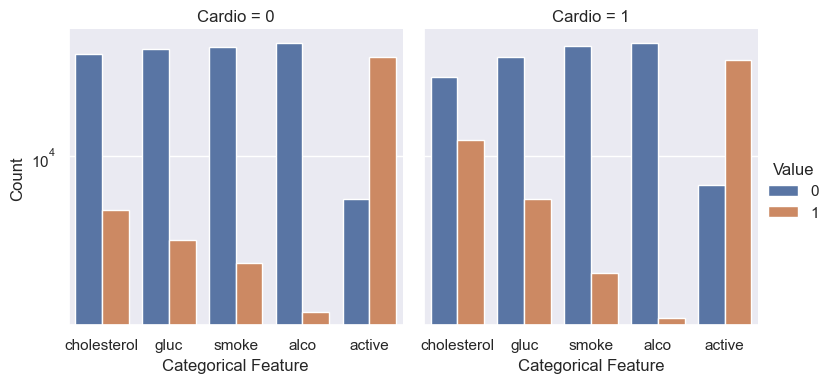

In [24]:
melted_df = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active'],
                    var_name='Categorical Feature', value_name='Value')


g = sb.catplot(data=melted_df, x='Categorical Feature', hue='Value', kind='count', col='cardio', height=4, aspect=1)

# Set titles and labels
g.set_titles("Cardio = {col_name}")
g.set_xlabels("Categorical Feature")
g.set_ylabels("Count")
g.set(yscale="log")

# Show the plot
plt.show()



In [25]:
# Filter out incorrect diastolic pressure (ap_lo > ap_hi)
df = df[df['ap_lo'] <= df['ap_hi']]

# Filter out height less than the 2.5th percentile and more than the 97.5th percentile
height_lower_percentile = df['height'].quantile(0.025)
height_upper_percentile = df['height'].quantile(0.975)
df = df[(df['height'] >= height_lower_percentile) & (df['height'] <= height_upper_percentile)]

# Filter out weight less than the 2.5th percentile and more than the 97.5th percentile
weight_lower_percentile = df['weight'].quantile(0.025)
weight_upper_percentile = df['weight'].quantile(0.975)
df = df[(df['weight'] >= weight_lower_percentile) & (df['weight'] <= weight_upper_percentile)]


In [26]:
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,23.507805,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,28.710479,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,23.011177,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,0,0,0,0,1,1,23.661439,0
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,29.384757,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,26.927438,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,27.099251,1


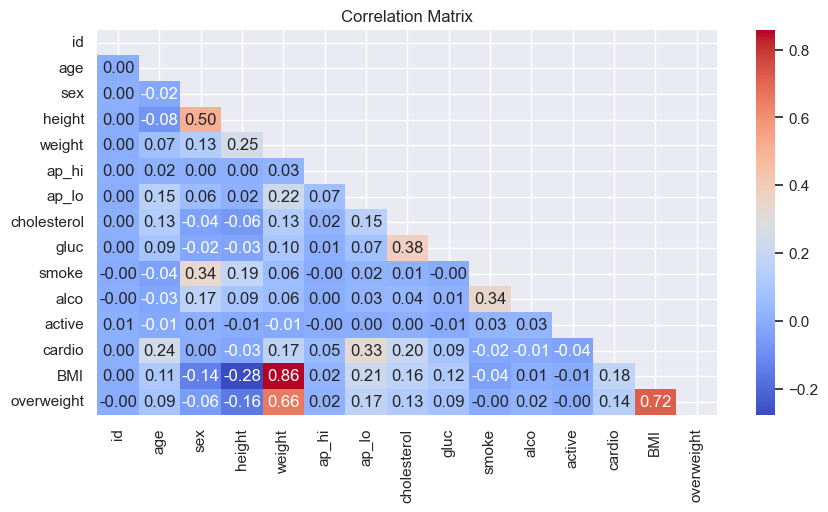

In [37]:
correlation_matrix = df.corr()
# print(correlation_matrix)

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 5))

# Create a heatmap with the correlation matrix
sb.heatmap(data=correlation_matrix, mask=mask, annot=True, fmt=".2f", cmap="coolwarm")

# Set the title of the heatmap
plt.title("Correlation Matrix")

# Show the plot
plt.show()
